<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Seismic Tomography - simple example </div>
        </div>
    </div>
</div>

##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))

## Basic Equations
### Inverse Problem
The process of predicting (or estimating) the numerical vales of a set of model parameters $\textbf{m}$ of an assumed model based on observation $\textbf{d}$.

Let us suppose, we have measured the data (travel times) on the Earth's surface. We want to find a set of model parameters (slowness). Then we formulate the forward problem as

$$
\textbf{d} = \textbf{G}\textbf{m}
$$

Where $\textbf{G}$ is a system matrix.

In order to find $\textbf{m}$, in this exercise solve normal equation. Normal equation is given by

$$
\textbf{G}^{T}\textbf{Gm} = \textbf{G}^{T}\textbf{d}
$$

We solve the normal equation to get $\textbf{m}$
$$
\textbf{m} = (\textbf{G}^{T}\textbf{G})^{-|} \textbf{G}^{T}\textbf{d}
$$

And, the resolution matrix is given by
$$
\textbf{res} = (\textbf{G}^{T}\textbf{G})^{-|} \textbf{G}^{T}\textbf{G}
$$

In [12]:
# important stuff, run at the very beginning

import numpy as np
import matplotlib.pyplot as plt

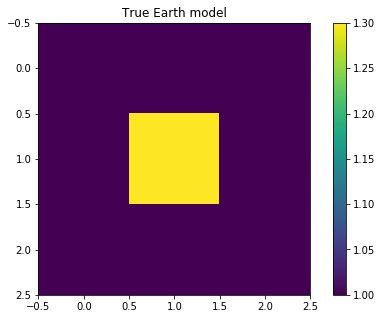

 Forward operator to generate data 
[ 3.          3.3         3.          3.          3.3         3.
  4.66690476  1.41421356]
 Explicit calculation of data 
[ 3.          3.3         3.          3.          3.3         3.
  4.66690476  1.41421356]


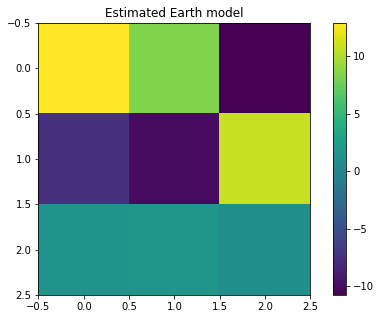

In [17]:
# dimension of the quadratic Earth model
n = 3

# True earth model initialization (slowness)
m = np.ones((n,n))
m[1][1]=1.3

# plot earth model
plt.figure(figsize=(8,5))
plt.imshow(m)
plt.title('True Earth model')
plt.colorbar()
plt.show()

# generate true data
# data are the travel times across the domainsaccording to specific paths
# vertical paths
l = 1
t = np.zeros(8)
t[0] = l * (m[0][0]+m[0][1]+m[0][2])     # i.e. t = distance * slowness    
t[1] = l * (m[1][0]+m[1][1]+m[1][2])
t[2] = l * (m[2][0]+m[2][1]+m[2][2])

# horizontal paths
t[3] = l * (m[0][0]+m[1][0]+m[2][0])
t[4] = l * (m[0][1]+m[1][1]+m[2][1])
t[5] = l * (m[0][2]+m[1][2]+m[2][2])

# diagonal paths
l2 = np.sqrt(2)*l
t[6] = l2*(m[0][0]+m[1][1]+m[2][2])
t[7] = l2*m[2][2]

# t is now a vector data
# end of generating true data

# system matrix
s = np.sqrt(2)

G = G = np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0],\
                  [0, 1, 0, 0, 1, 0, 0, 1, 0],\
                  [0, 0, 1, 0, 0, 1, 0, 0, 1],\
                  [1, 1, 1, 0, 0, 0, 0, 0, 0],\
                  [0, 0, 0, 1, 1, 1, 0, 0, 0],\
                  [0, 0, 0, 0, 0, 0, 1, 1, 1],\
                  [s, 0, 0, 0, s, 0, 0, 0, s],\
                  [0, 0, 0, 0, 0, 0, 0, 0, s]])

# reshape m
s = np.zeros(9)
ii = 0
for i in range (0,n):
    for j in range(0,n):
        s[ii]=m[i][j]
        ii = ii+1
        
# Test forward operator
print(' Forward operator to generate data ')
print(G.dot(s))
print(' Explicit calculation of data ')
print(t.transpose())

# solve inverse problem
mest = ((np.linalg.inv(G.transpose().dot(G))).dot(G.transpose())).dot(t)

# plot earth model
plt.figure(figsize=(8,5))
plt.imshow((np.reshape(mest,(3,3))).transpose())
plt.title('Estimated Earth model')
plt.colorbar()
plt.show()